In [4]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def read_(fname):
    rc = ""
    with open(fname) as f:
        rc = f.readlines()
    return "".join(rc)

fpath = os.path.join(os.getcwd(),"queries","2")
fnames = {fname: os.path.join(fpath,fname) for fname in os.listdir(fpath) if fname.endswith(".flux")}
fqueries = {fname: read_(fnames[fname]) for fname in fnames.keys()}

In [8]:
fname = "234b.flux"

data = pd.read_csv(os.path.join(fpath,"%s.txt"%(fname)),sep="|")
data["_time"] = pd.to_datetime(data["_time"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   table     24 non-null     int64              
 1   _batch    24 non-null     int64              
 2   _lorry    24 non-null     int64              
 3   _time     24 non-null     datetime64[ns, UTC]
 4   _loading  24 non-null     int64              
dtypes: datetime64[ns, UTC](1), int64(4)
memory usage: 1.1 KB


In [7]:
lorries = data["_lorry"].unique()

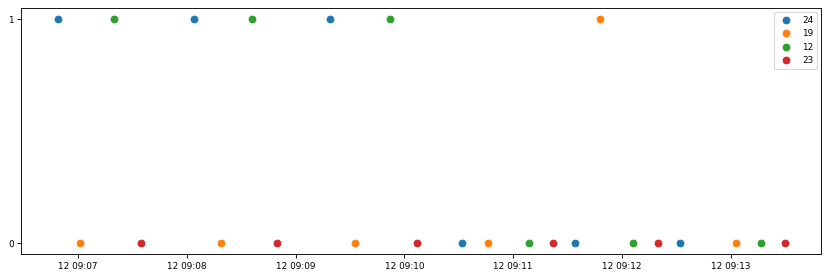

In [13]:
plt.rcParams["font.size"] = 8
plt.rcParams["figure.dpi"] = 80
plt.rcParams["lines.linewidth"] = .6

ncols,nrows = 1,1
nwidth,nheight = 16,4

fig, ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=[nwidth*ncols,nheight*nrows],dpi=plt.rcParams["figure.dpi"])
fig.subplots_adjust(right=0.75)

for lorry in lorries:
    ii = data["_lorry"]==lorry
    xx = data.loc[ii,"_time"]
    yy = data.loc[ii,"_loading"]
    ax.plot(xx,yy,"o",label="%d"%(lorry))

ax.legend()
ax.set_yticks([0,1])

plt.show()
plt.close()

In [2]:
fname = "_224.flux"

data = pd.read_csv(os.path.join(fpath,"%s.txt"%(fname)),sep="|")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86401 entries, 0 to 86400
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   table         86401 non-null  int64  
 1   _field        86401 non-null  object 
 2   _measurement  86401 non-null  object 
 3   _start        86401 non-null  object 
 4   _stop         86401 non-null  object 
 5   _time         86401 non-null  object 
 6   _value        18471 non-null  float64
 7   target        18471 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 5.3+ MB


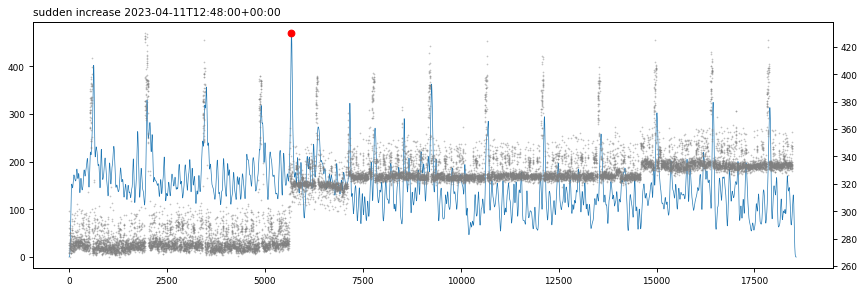

In [3]:


vv = data.target.to_numpy()
tt = data._time.to_numpy()

dv = pd.Series(vv[1:]-vv[:-1]).abs()
yy = dv.rolling(100, min_periods=1, win_type='parzen').sum()

xx = np.arange(len(yy))

xm = yy.argmax()
ym = yy[xm]

tm = tt[xm]

# ---------------------------

plt.rcParams["font.size"] = 8
plt.rcParams["figure.dpi"] = 80
plt.rcParams["lines.linewidth"] = .6

ncols,nrows = 1,1
nwidth,nheight = 16,4

fig, ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=[nwidth*ncols,nheight*nrows],dpi=plt.rcParams["figure.dpi"])
fig.subplots_adjust(right=0.75)

ax.plot(xx,yy)
ax.plot([xm],[ym],"o",color="red")

ax.twinx().plot(vv,".",ms=1,color="grey",alpha=0.5)

ax.set_title("sudden increase %s"%(tm),x=0,ha="left")

plt.show()
plt.close()

In [4]:
import pandas as pd

fname = "234b.flux"

data = pd.read_csv(os.path.join(fpath,"%s.txt"%(fname)),sep="|")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   table   508 non-null    int64 
 1   _field  508 non-null    object
 2   _time   508 non-null    object
 3   _value  508 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 16.0+ KB


In [8]:
lorries = data._value[data._value > 1].unique()

import plotly.graph_objects as go

fig = go.Figure()

for lorry in lorries:

    index = (data["_value"]==lorry) #& (data["_time"]<="2023-04-12T07:38:00")
        
    
    fig.add_trace(
        go.Scatter(
            x=data.loc[index,"_time"],
            y=data.loc[index,"_value"].shape[0]*[2],
            marker=dict(                
                ),
            mode='markers',            
            name="%02d"%(lorry)
        ))

index = (data["_value"].isin([1])) #& (data["_time"]<="2023-04-12T07:38:00")

fig.add_trace(
    go.Scatter(
        x=data.loc[index,"_time"],
        y=data.loc[index,"_value"],
        marker=dict(                
            ),
        mode='markers',            
        name="%02d"%(lorry)
    ))


fig.show()